In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lmfit
import os
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pickle
norm_df = pickle.load(open('./data/series_normalized/NNNlib2b_DNA_20211216_normalized.pkl', 'rb'))

In [6]:
len(norm_df.dropna()) / len(norm_df)

0.9653247366990692

In [2]:
%%time
scratchdir = '/Users/yuxi/mnt/scratch'
# sf = pd.read_csv(os.path.join(scratchdir, 'NNNlib2b_Oct6/data/fitted_single_cluster/NNNlib2b_DNA_20211022.CPfitted.gz'), sep='\t')
sf = pd.read_csv('data/fitted_single_clusters/NNNlib2b_DNA_20211022.CPfitted.gz', sep='\t')

CPU times: user 8.08 s, sys: 316 ms, total: 8.39 s
Wall time: 8.4 s


In [ ]:
%%time
hdf_file = 'data/fitted_single_clusters/NNNlib2b_DNA_20211022.CPfitted.h5'
sf.to_hdf('data/fitted_single_clusters/NNNlib2b_DNA_20211022.CPfitted.h5', format='t', key='cf', data_columns=True, mode='w')

In [ ]:
del sf

In [27]:
sf.columns

Index(['clusterID', 'fmin', 'fmax', 'dH', 'Tm', 'fmin_stderr', 'fmax_stderr',
       'dH_stderr', 'Tm_stderr', 'RMSE', 'rsqr'],
      dtype='object')

/Users/yuxi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rsqr', ylabel='Density'>

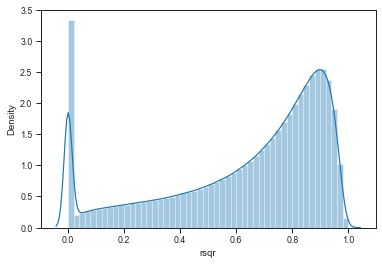

In [4]:
sns.distplot(sf.rsqr)

/Users/yuxi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fmax', ylabel='Density'>

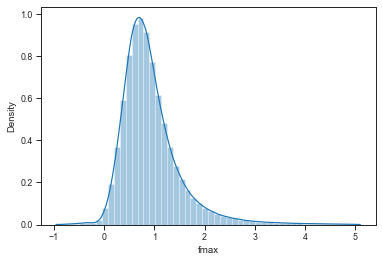

In [7]:
query = 'rsqr > 0.5 & fmin > -1 & fmin < 2 & fmin_stderr < fmin + 1 & fmax > -1 & fmax < 5 & fmax_stderr < fmax + 1'
sns.distplot(sf.query(query).fmax)

/Users/yuxi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RMSE', ylabel='Density'>

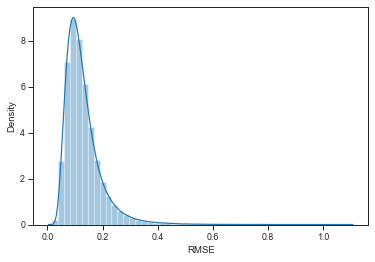

In [28]:
sns.distplot(sf.query(query).RMSE)

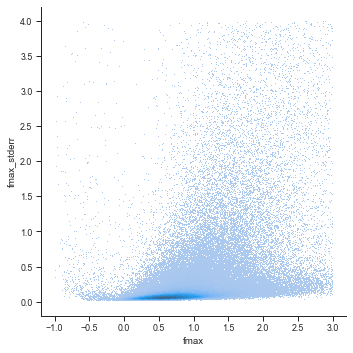

In [13]:
query = 'rsqr > 0.5 & fmin > -1 & fmin < 2 & fmin_stderr < fmin + 1 & fmax > -1 & fmax < 3 & fmax_stderr < 4'
sns.displot(x=sf.query(query).fmax, y=sf.query(query).fmax_stderr)

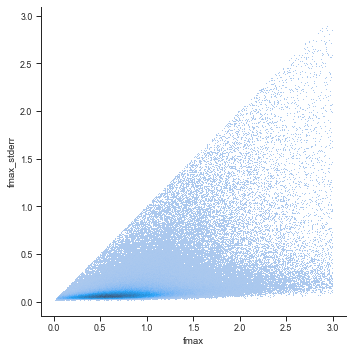

In [12]:
query = 'rsqr > 0.5 & fmin > -1 & fmin < 2 & fmin_stderr < fmin + 1 & fmax > 0 & fmax < 3 & fmax_stderr < fmax'
sns.displot(x=sf.query(query).fmax, y=sf.query(query).fmax_stderr)

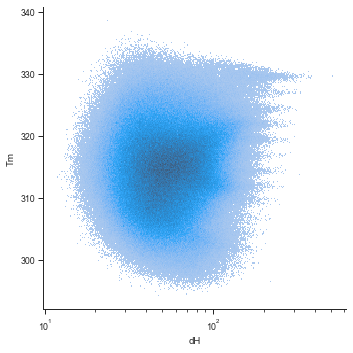

In [5]:
query = 'rsqr > 0.5 & fmin > -1 & fmin < 2 & fmin_stderr < fmin + 0.5 & fmax > 0 & fmax < 3 & fmax_stderr < fmax & Tm_stderr < 10 & dH_stderr < 100'
sns.displot(x=-sf.query(query).dH, y=sf.query(query).Tm, log_scale=(True, False))

In [9]:
%whos

Variable     Type         Data/Info
-----------------------------------
cf           DataFrame                             <...>936113 rows x 11 columns]
hdf_file     str          data/fitted_single_cluste<...>_DNA_20211022.CPfitted.h5
lmfit        module       <module 'lmfit' from '/Us<...>kages/lmfit/__init__.py'>
os           module       <module 'os' from '/Users<...>y38/lib/python3.8/os.py'>
pd           module       <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
query_fmin   str          rsqr > 0.5 & fmin > -1 & <...> & fmin_stderr < fmin + 1
sns          module       <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>


Data loaded


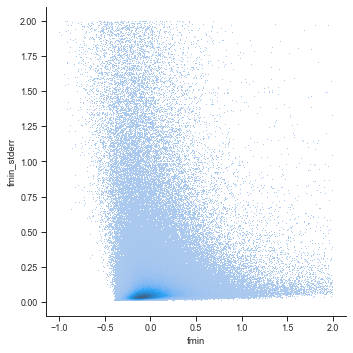

In [3]:
query_fmin = 'rsqr > 0.5 & fmin > -1 & fmin < 2 & fmin_stderr < 2'
hdf_file = 'data/fitted_single_clusters/NNNlib2b_DNA_20211022.CPfitted.h5'
cf = pd.read_hdf(hdf_file, key='cf', where=query_fmin)
print('Data loaded')

sns.displot(data=cf, x='fmin', y='fmin_stderr')

In [ ]:
query_fmin = 'rsqr > 0.5 & fmin > -1 & fmin < 2'
cf = sf.query(query_fmin)
sns.displot(data=cf, x='fmin', y='fmin_stderr')

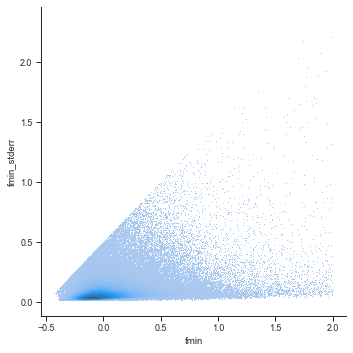

In [4]:
query_fmin = 'rsqr > 0.5 & fmin > -1 & fmin < 2 & fmin_stderr < fmin + .5'
cf = sf.query(query_fmin)
sns.displot(data=cf, x='fmin', y='fmin_stderr')

In [ ]:
%%time
def plot_fmax(cf_file, query):
    cf = pd.read_csv(cf_file, sep='\t')
    #cf = pd.read_hdf(hdf_file, key='cf', where=query, columns = [['fmax', 'fmax_stderr']], start=0, end=10000)
    print('Data loaded')
    cf = cf.query(query)
    print('shape of filtered cluster fit:', cf.shape)
    
    sns.displot(data=cf, x='fmax', y='fmax_stderr', kind='hist', binwidth=(.25,.25))
    plt.show()

query = 'rsqr > 0.5 & fmin > -1 & fmin < 2 & fmin_stderr < 2 & fmax > -1 & fmax < 10'
cf_file = 'data/fitted_single_clusters/NNNlib2b_DNA_20211022.CPfitted.gz'
plot_fmax(cf_file, query)

Data loaded
                                           clusterID      fmin      fmax  \
0        M03796:16:000000000-JMHNB:1:2101:22833:2108  0.471587  1.656089   
4        M03796:16:000000000-JMHNB:1:2101:23892:2118  0.040860  1.627204   
6        M03796:16:000000000-JMHNB:1:2101:23975:2123  0.208280  0.810263   
10       M03796:16:000000000-JMHNB:1:2101:22703:2125 -0.059401  0.780555   
11       M03796:16:000000000-JMHNB:1:2101:23041:2126 -0.340174  0.313239   
...                                              ...       ...       ...   
3147445  M03796:16:000000000-JMHNB:1:2118:8729:24418 -0.013975  1.245257   
3147448  M03796:16:000000000-JMHNB:1:2118:8361:24421 -0.061627  0.716325   
3147452  M03796:16:000000000-JMHNB:1:2118:7797:24427 -0.015838  1.456775   
3147454  M03796:16:000000000-JMHNB:1:2118:9436:24428 -0.132428  1.909481   
3147458  M03796:16:000000000-JMHNB:1:2118:8437:24431  0.235954  8.886106   

                  dH          Tm  fmin_stderr  fmax_stderr     dH_stderr  \

In [4]:
norm_sc = pd.read_pickle(os.path.join(scratchdir, 'NNNlib2b_Oct6/data/series_normalized/NNNlib2b_DNA_20211022_normalized.pkl'))

In [5]:
norm_sc

,Green14_20_norm,Green15_22.5_norm,Green16_25_norm,Green17_27.5_norm,Green18_30_norm,Green19_32.5_norm,Green20_35_norm,Green21_37.5_norm,Green22_40_norm,Green23_42.5_norm,Green24_45_norm,Green25_47.5_norm,Green26_50_norm,Green27_52.5_norm,Green28_55_norm,Green29_57.5_norm,Green30_60_norm
clusterID,,,,,,,,,,,,,,,,,
M03796:16:000000000-JMHNB:1:2101:22833:2108,0.271506,0.392020,0.683060,0.843199,0.952861,0.275269,0.288531,0.390545,0.560426,0.569136,0.279346,0.296413,0.222198,0.825038,0.945014,1.151060,1.546360
M03796:16:000000000-JMHNB:1:2101:23198:2114,0.356773,1.115383,0.831336,1.110702,1.234437,1.175706,0.332515,0.533298,0.619792,0.721086,0.536089,0.318487,0.355807,0.924493,0.612632,0.753866,0.935038
M03796:16:000000000-JMHNB:1:2101:24124:2116,-0.156245,-0.062625,-0.225639,-0.006103,-0.185069,-0.168951,-0.131880,-0.284620,-0.229623,-0.223838,-0.190749,-0.119735,-0.035525,0.622164,0.600625,0.016443,-0.214460
M03796:16:000000000-JMHNB:1:2101:23397:2117,0.414539,0.939131,1.794695,2.629262,2.776969,1.459679,1.478564,2.212782,3.017857,2.534803,1.781302,1.280921,1.826321,2.970254,2.030700,3.271563,2.905158
M03796:16:000000000-JMHNB:1:2101:23892:2118,0.037892,0.215104,0.160747,0.740920,0.780998,0.835362,0.474602,0.919391,1.162325,1.434404,1.303689,1.593755,1.648309,1.877602,2.300129,1.447938,0.678470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M03796:16:000000000-JMHNB:1:2118:7912:24433,0.377061,0.105549,0.326821,0.433196,0.719144,0.387181,0.879797,0.753965,0.821670,1.126068,1.154132,1.020659,1.462605,1.221320,1.181796,0.362554,2.434992
M03796:16:000000000-JMHNB:1:2118:7477:24435,-0.127220,0.464111,0.038028,-0.374413,-0.417498,-0.345813,-0.388034,-0.394005,0.251384,1.137424,0.884477,0.588288,0.128455,0.131201,0.524450,0.841460,1.731344
M03796:16:000000000-JMHNB:1:2118:7731:24441,2.458787,1.523022,2.448629,2.429326,2.497759,3.117082,2.615811,2.537290,2.875161,3.122210,3.054215,1.661907,1.718649,0.834799,1.642057,0.408364,1.836064
